 You are a data scientist working for a healthcare company, and you have been tasked with creating a 
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been 
given a dataset (diabetes.csv) with the following variables:
 1. Pregnancies: Number of times pregnant (integer)
 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes 
based on family history) (float)
 8. Age: Age in years (integer)
 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
 Here’s the dataset link: 
usp=sharing
 https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?
 Your goal is to create a decision tree to predict whether a patient has diabetes based on the other 
variables. Here are the steps you can follow:

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score ,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [42]:
url = "https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2"

df = pd.read_csv(url)

In [43]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


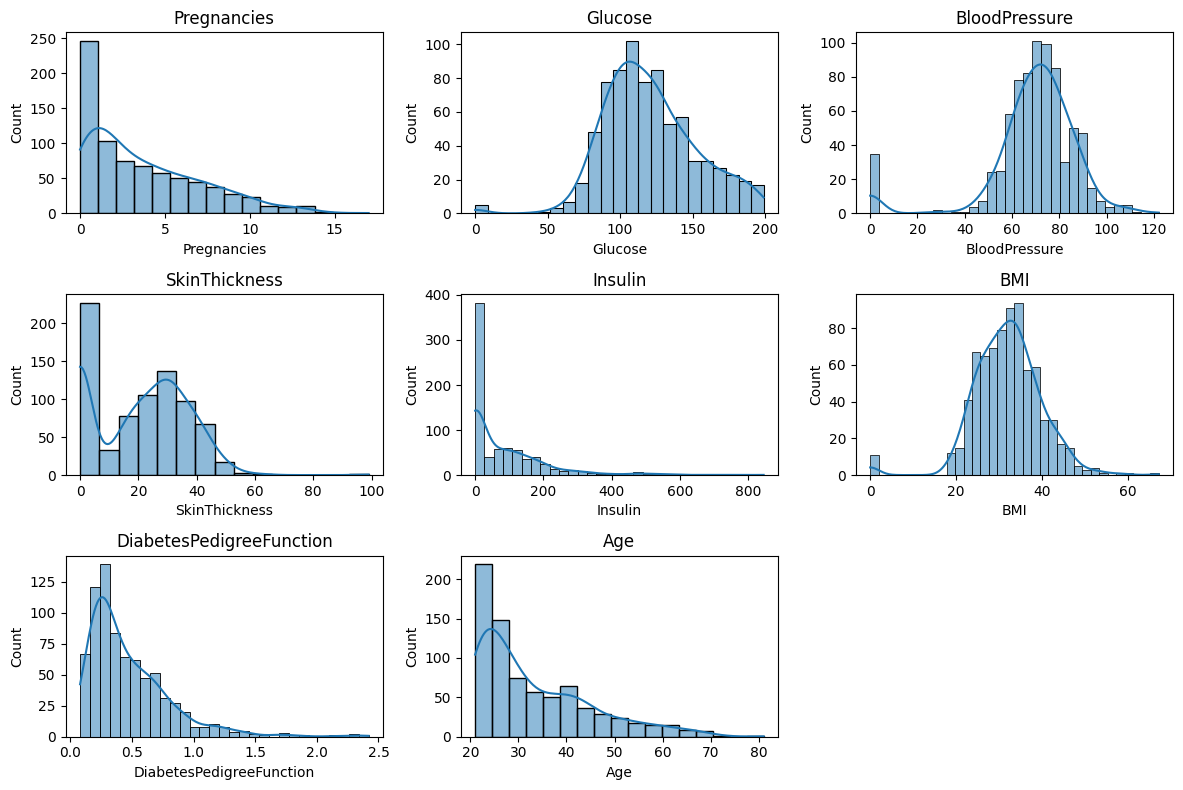

In [45]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


#  Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [46]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


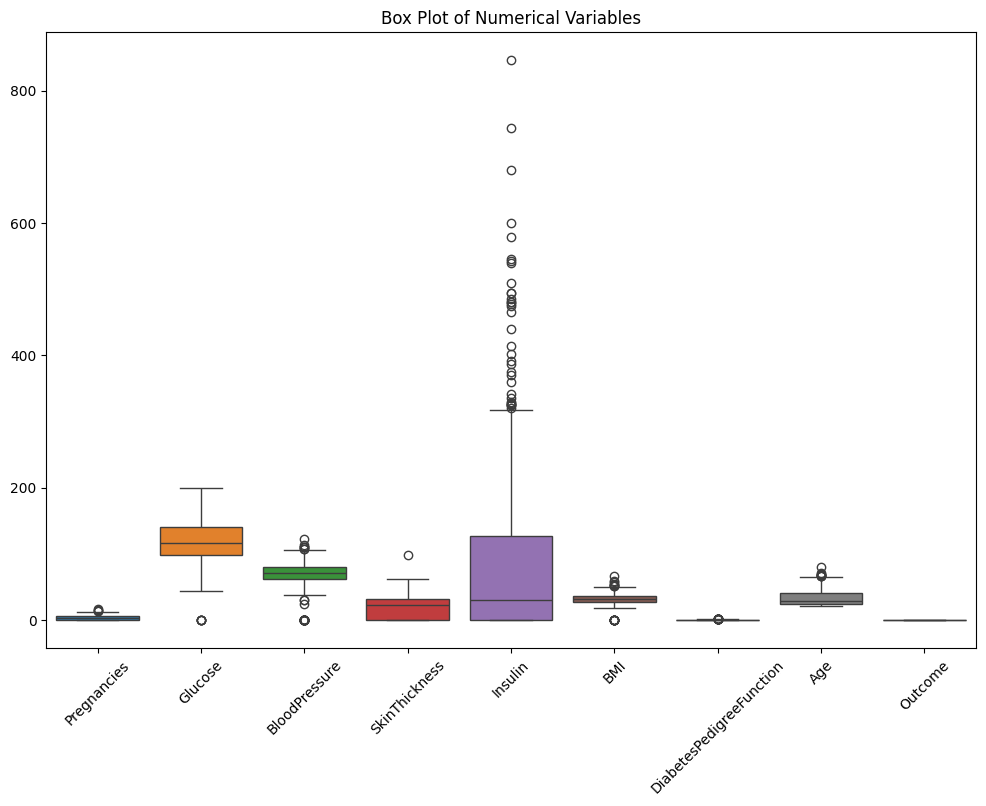

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Variables")
plt.show()


In [51]:
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outliers = outlier_detector.fit_predict(df.drop(columns='Outcome'))
df = df[outliers == 1]

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [52]:
X = df.iloc[:,:-1]
Y = df.Outcome

In [53]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [54]:
Y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 729, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#  Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [61]:
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42,34]
}

In [65]:
grid_search = GridSearchCV(treeclassifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_decision_tree = DecisionTreeClassifier(**best_params)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [66]:
best_decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [67]:

y_pred = best_decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8132780082987552


# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.7344398340248963
Precision: 0.5517241379310345
Recall: 0.6575342465753424
F1 Score: 0.6


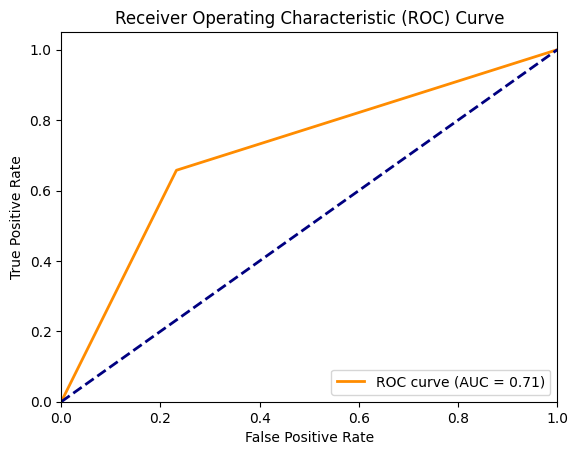

In [89]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

y_prob = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#  Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

[Text(0.4757593457943925, 0.9583333333333334, 'x[1] <= 127.5\ngini = 0.46\nsamples = 488\nvalue = [313, 175]'),
 Text(0.2488317757009346, 0.875, 'x[7] <= 30.5\ngini = 0.337\nsamples = 312\nvalue = [245, 67]'),
 Text(0.11565420560747663, 0.7916666666666666, 'x[6] <= 0.666\ngini = 0.195\nsamples = 192\nvalue = [171, 21]'),
 Text(0.0911214953271028, 0.7083333333333334, 'x[0] <= 6.5\ngini = 0.129\nsamples = 159\nvalue = [148, 11]'),
 Text(0.08177570093457943, 0.625, 'x[5] <= 50.15\ngini = 0.119\nsamples = 158\nvalue = [148, 10]'),
 Text(0.07242990654205607, 0.5416666666666666, 'x[5] <= 29.6\ngini = 0.108\nsamples = 157\nvalue = [148, 9]'),
 Text(0.0630841121495327, 0.4583333333333333, 'gini = 0.0\nsamples = 80\nvalue = [80, 0]'),
 Text(0.08177570093457943, 0.4583333333333333, 'x[4] <= 36.5\ngini = 0.206\nsamples = 77\nvalue = [68, 9]'),
 Text(0.04205607476635514, 0.375, 'x[1] <= 111.5\ngini = 0.35\nsamples = 31\nvalue = [24, 7]'),
 Text(0.018691588785046728, 0.2916666666666667, 'x[4] <= 27

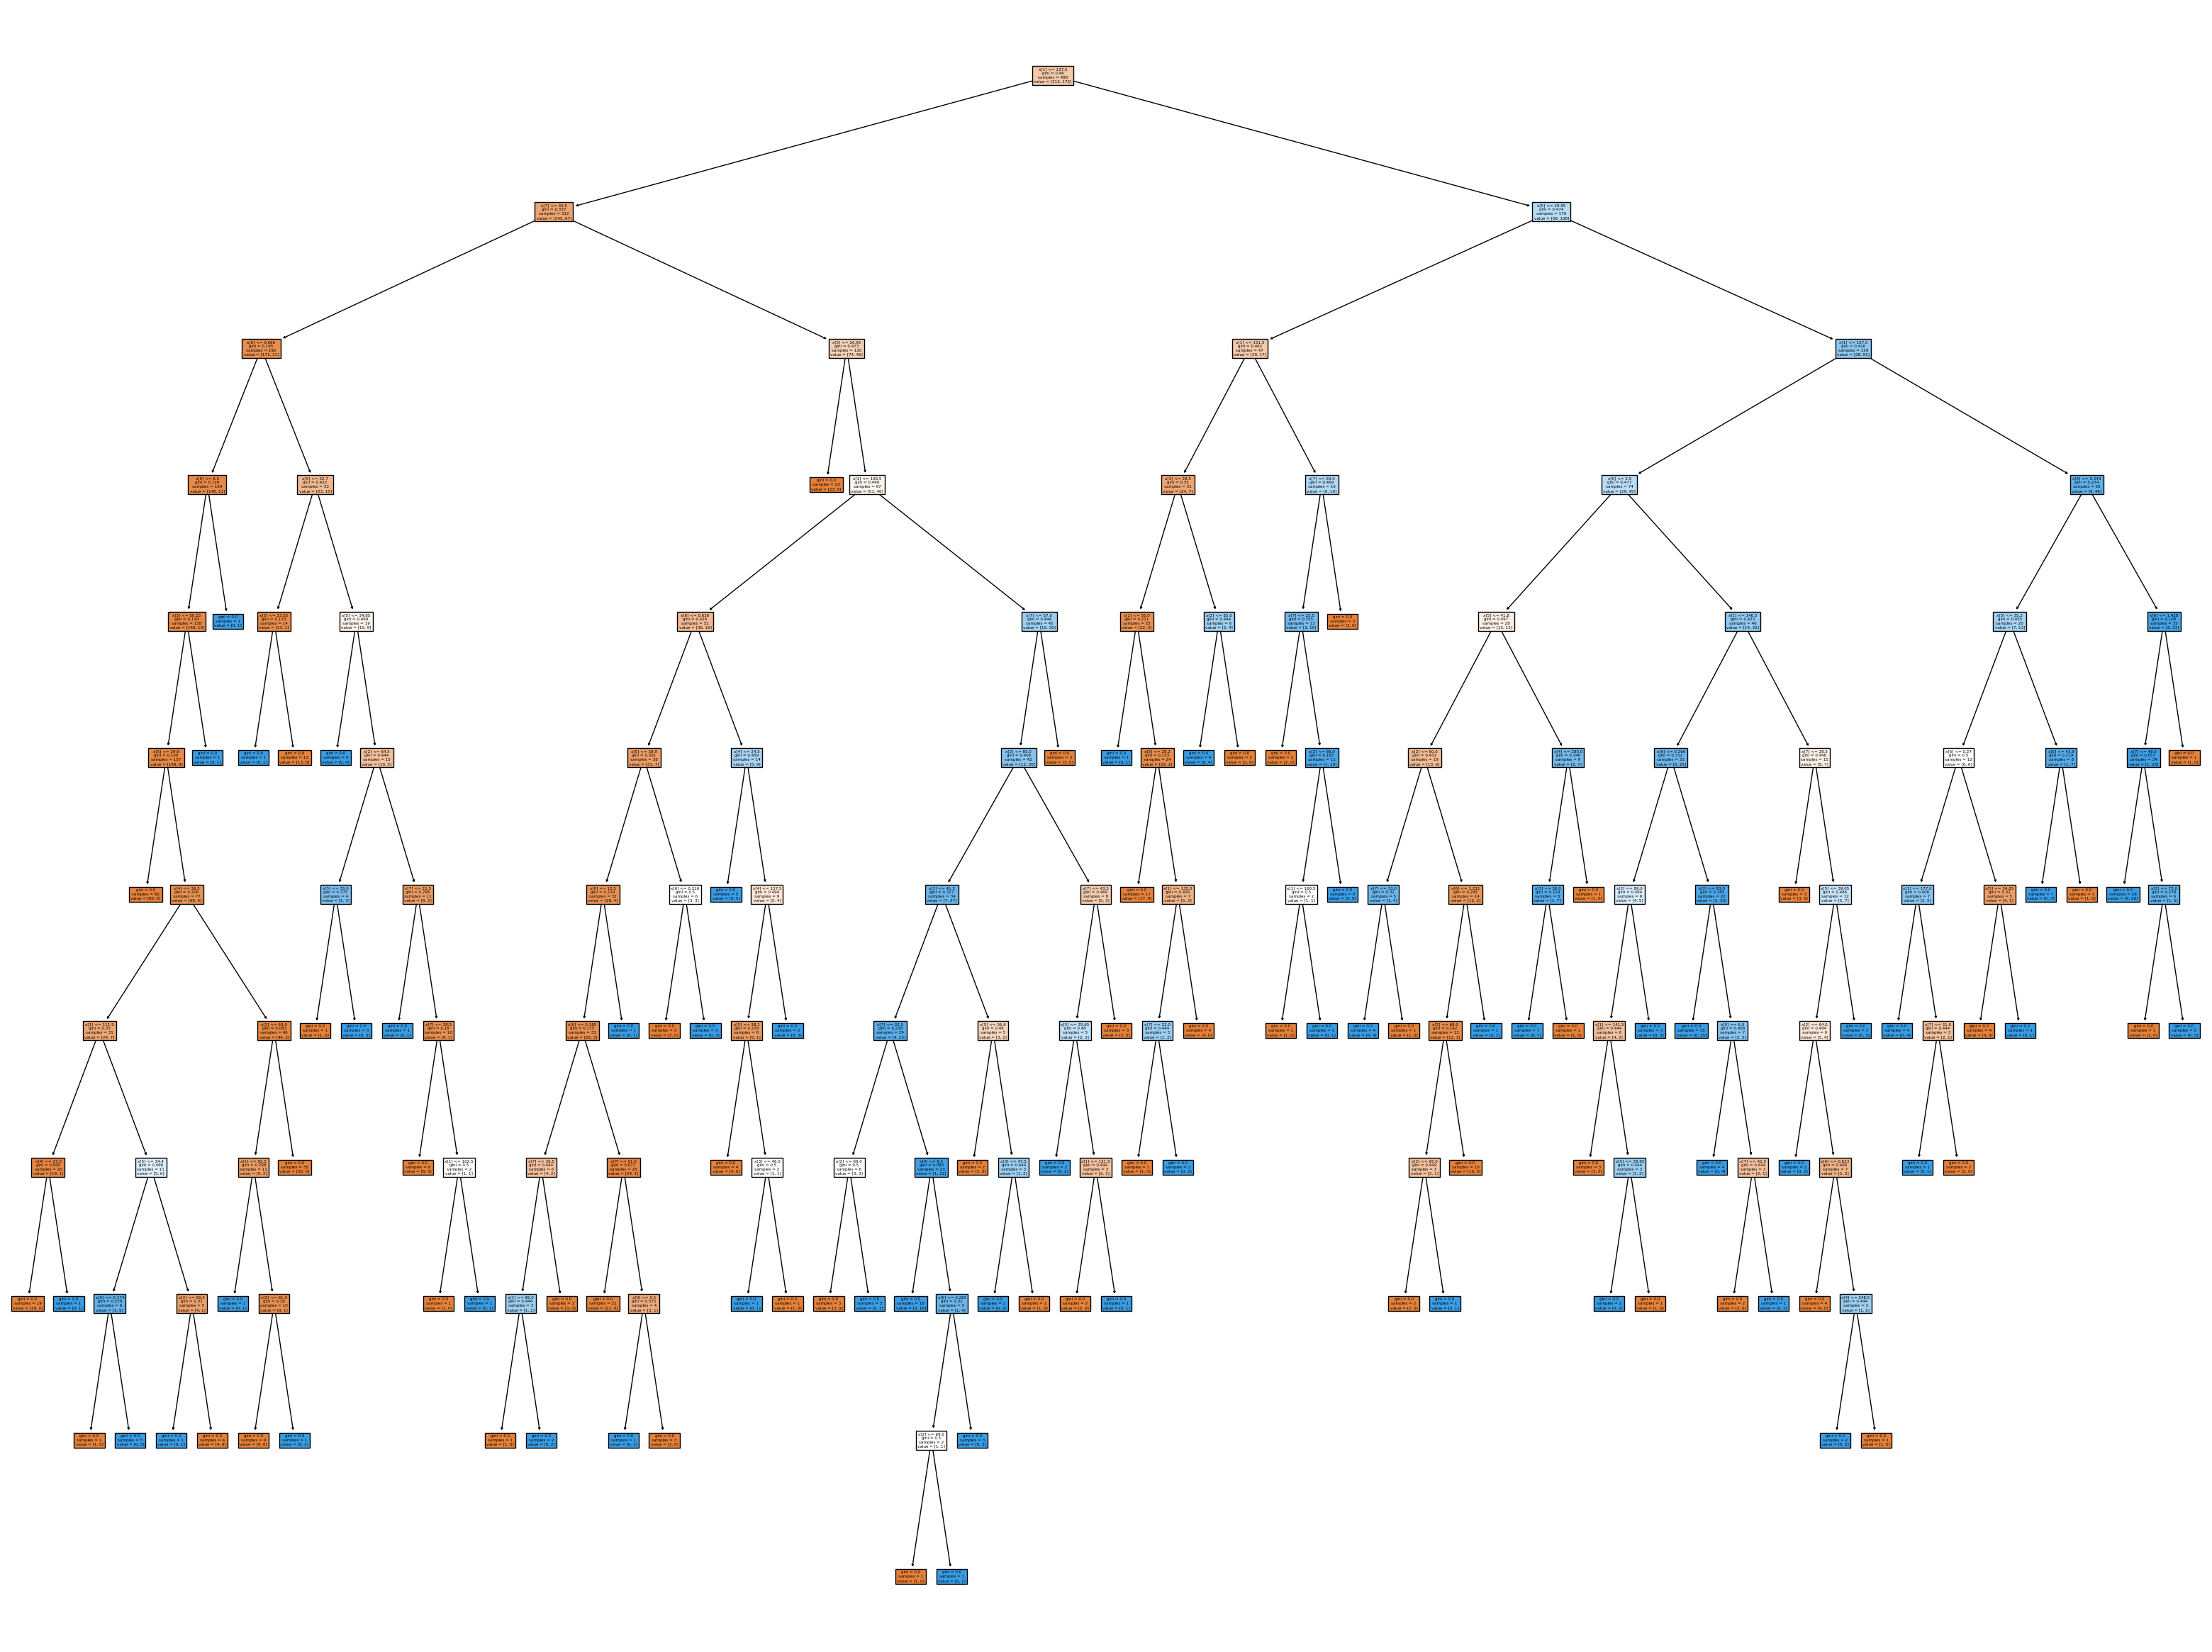

In [82]:
from sklearn import tree
plt.figure(figsize=(40,30))
tree.plot_tree(treeclassifier,filled=True)

1. **Root Node**: Start by examining the root node, which represents the entire dataset. The feature and threshold used for the first split at the root node indicate the most significant predictor variable.

2. **Internal Nodes**: Internal nodes represent splits in the data based on feature thresholds. Analyze each internal node to understand which feature and threshold are used for splitting the data.

3. **Branches**: Branches emanating from each internal node represent different outcomes based on the value of the feature being split. Follow the branches to understand how the decision tree partitions the data into different classes.

4. **Leaves**: Leaves represent the final decision or prediction made by the decision tree. Each leaf node corresponds to a class label, and the majority class in the leaf node determines the predicted class for instances that reach that node.

5. **Important Variables and Thresholds**: Identify the most important variables by examining the top nodes in the decision tree. Features that appear near the root node or higher up in the tree hierarchy are generally more important. The thresholds associated with these variables provide insights into the critical values or ranges that differentiate between classes.

6. **Patterns and Trends**: Use domain knowledge and common sense to interpret the patterns and trends revealed by the decision tree. Look for logical explanations for why certain features and thresholds are important for predicting the target variable. Consider how the decision tree captures relationships and interactions between variables that are relevant to the problem domain.

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

1. **Split Data**: Split the dataset into training and testing sets. Train the decision tree model on the training set and evaluate its performance on the testing set to assess generalization to unseen data.

2. **Cross-Validation**: Use cross-validation techniques such as k-fold cross-validation to validate the decision tree model. This helps to ensure that the model's performance is consistent across different subsets of the data and reduces the risk of overfitting.

3. **Out-of-Time Validation**: Validate the decision tree model on data collected at different time periods to assess its robustness to changes over time. This helps to determine if the model's performance degrades or remains stable when applied to new data.

4. **Sensitivity Analysis**: Conduct sensitivity analysis by varying input parameters or assumptions to assess the impact on the decision tree model's predictions. This helps to understand the model's sensitivity to changes in input variables and identify potential sources of uncertainty.

5. **Scenario Testing**: Test the decision tree model under different scenarios or conditions to evaluate its performance across a range of potential outcomes. This allows for the exploration of different what-if scenarios and helps to identify risks associated with the model's predictions.

6. **Performance Metrics**: Use appropriate performance metrics such as accuracy, precision, recall, F1 score, and ROC curve analysis to evaluate the decision tree model's performance under different validation scenarios.

7. **Interpretability**: Assess the interpretability of the decision tree model by examining the splits, branches, and leaves. A highly interpretable model is easier to validate and understand, making it more suitable for sensitive applications or domains.